# Social Network Analysis for Product Cross-Selling

#### Goal:
`Use social media data to recommend products to a network of customers based on their interest similarities.`

### Who this workshop is for:
- Data scientists who are working in companies that have multiple products, for example: banks, e-commerce, etc., where the social media handles of the customers are known.
- People who are generally curious about network analysis.

### Brief intro about me:

- I am currently a data scientist at Sterling Bank.
- I do a bit of research too, and have some published papers.
- I’ve been a DS/ML mentor at She Code Africa and AI Saturdays Lagos.
- I’ve spoken at technical events including as a keynote speaker. 
- You can always find me on Twitter or LinkedIn with “/sharonibejih”.


## Social Network Analysis: Intro:
Social Media provides more than just posts: It's a complex web of interactions.


<img src='jos61nj46.svg'></img>


On most SM platforms, like X (fka Twitter), people follow accounts that interest them. This following list can create a track to the community a customer belongs to.

A network graph is composed of these three:

`Nodes` = individuals or entities.

`Edges` = relationships or interactions.

`Community` = Clusters or groups of similar entities.


## How to Build a SNA in Python

`pip install networkx`

In [3]:
import networkx as nx

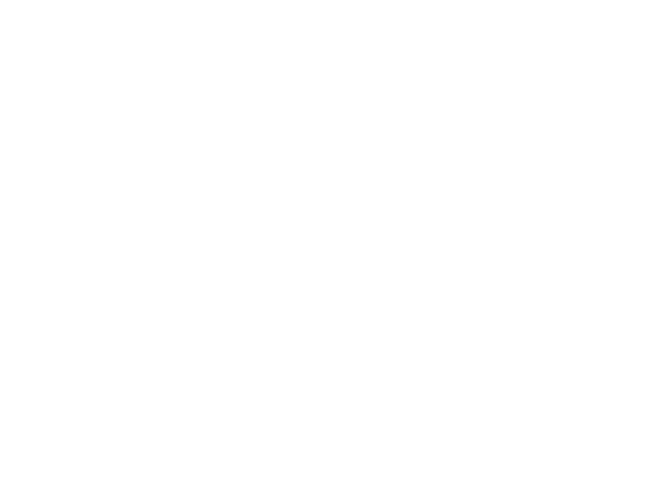

In [4]:
# Create an empty graph
G = nx.Graph()

# display the empty graph
nx.draw(G)

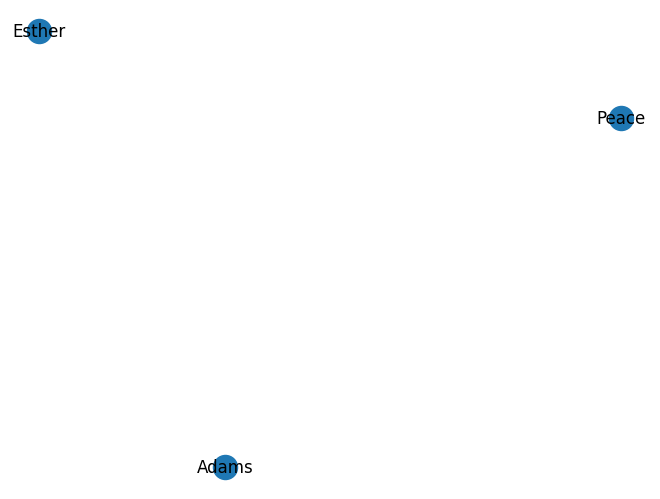

In [5]:
# then we start adding nodes to represent the entities. We use random names of people as an example.

G.add_node('Esther', label='Customer_ID_for_Esther')
G.add_node('Adams', label='Customer_ID_for_Adams')
G.add_node('Peace', label='Customer_ID_for_Peace')
nx.draw(G, with_labels=True) # by default, with_labels=False.

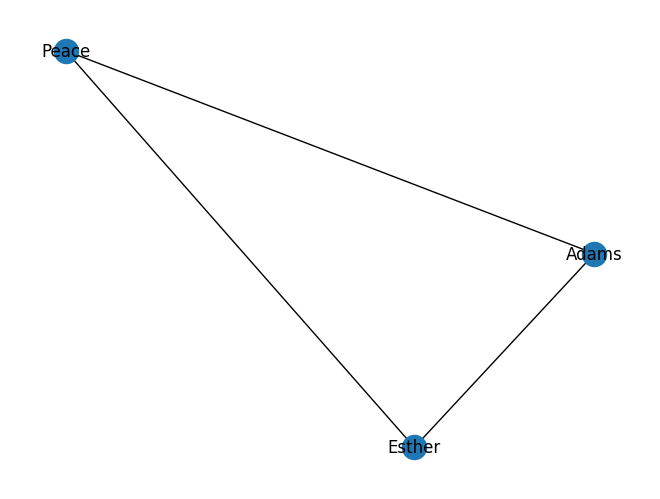

In [6]:
# then we add the edge. Remember that it shows relationship between entities. 

# So, we define the relationship that each customer has with themselves using weight values.
# higher weights represent a stronger relationship and a shorter edge distance.

# in this example, the weights are just random numbers.
G.add_edge('Peace', 'Adams', weight=0.7)
G.add_edge('Peace', 'Esther', weight=0.1)
G.add_edge('Adams', 'Esther', weight=0.9)

nx.draw(G, with_labels=True)

We can see that `Esther` and `Peace` are far apart because they have a very low similarity score.


Similarly, we can apply this in our case. Bear these in mind:

1. Each entity name like Esther or Adams, will be represented by the dataframe row index.
2. The label in the node will be replaced with the customer id for each row.
3. THe weight will be the cosine similarity score between any two rows indexes that are being compared.

----

## Hands On: Social Network Analysis for Product Recommendation

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [8]:
data = pd.read_csv("cleaned-data.csv")

data.head()

Customer  Shopping  Travel  Utilities  Betting  Fashion  Education  Health  \
0     jIv2         1       1          1        1        1          1       1   
1     VPqc         1       1          0        1        1          1       1   
2     wqQ0         1       1          1        0        0          1       0   
3     SW74         1       1          1        0        0          1       1   
4     JDeB         1       0          1        0        0          1       0   

   Investment  Power  Loan Seeking  Car Sales  Non-Interest  Product1  \
0           0      1             0          1             1         1   
1           0      0             0          0             0         1   
2           0      0             1          0             0         0   
3           0      0             0          0             0         0   
4           0      1             0          0             0         1   

   Product2  Product3  Product4  Product5  Product6  Product7  Product8  \
0         1         0         0         0         0         0         0   
1         1         0         0         0         0         0         0   
2         1         0         1         0         0         0         0   
3         1         0         1         0         0         0         0   
4         1         0         1         0         0         0         0   

   Product9  Product10 Customer_Rating  State_Residence Gender Marital_Status  \
0         0          0            HIGH               24   MALE            NaN   
1         0          0             MED               24   MALE            NaN   
2         0          0             MED               11   MALE            NaN   
3         0          0            HIGH               24   MALE            NaN   
4         0          0             MED               15   MALE            NaN   

   Age  
0   41  
1   50  
2   30  
3   24  
4   28

The possible interests in this work are `['Shopping', 'Travel', 'Utilities', 'Betting', 'Fashion', 'Education', 'Health', 'Investment', 'Power', 'Loan Seeking', 'Car Sales', 'Non-Interest']`. These were extracted using keywords that are identified in the handles of the customers' following list.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer         103 non-null    object
 1   Shopping         103 non-null    int64 
 2   Travel           103 non-null    int64 
 3   Utilities        103 non-null    int64 
 4   Betting          103 non-null    int64 
 5   Fashion          103 non-null    int64 
 6   Education        103 non-null    int64 
 7   Health           103 non-null    int64 
 8   Investment       103 non-null    int64 
 9   Power            103 non-null    int64 
 10  Loan Seeking     103 non-null    int64 
 11  Car Sales        103 non-null    int64 
 12  Non-Interest     103 non-null    int64 
 13  Product1         103 non-null    int64 
 14  Product2         103 non-null    int64 
 15  Product3         103 non-null    int64 
 16  Product4         103 non-null    int64 
 17  Product5         103 non-null    in

In [10]:
# drop Marital_Status column since majority are null

data.drop(columns=["Marital_Status"], inplace=True)

data.shape

(103, 27)

In the context of this project, we want to know how customers are related based on their interests. 

`edges` is the line that draws the relationship/connection between `nodes` based on their interests. 

- In this case, `nodes` == CustomerID.
- `edges` == the interest similarity score between any two customers.

__Step 1: Network Analysis__
1. Calculate the similarity scores each customer based on their identified interests. In this work we look at `['Shopping', 'Travel', 'Utilities', 'Betting', 'Fashion', 'Education', 'Health', 'Investment', 'Power', 'Loan Seeking', 'Car Sales', 'Non-Interest']`

2. Create an empty network graph, G.

3. Add the nodes, which are the Customers.

4. Use the edge to draw lines of connection between customers using the similarity scores.

__LET'S DIVE IN!__

1. Calculate similarity scores using `cosine_similarity`

In [11]:
from sklearn.metrics.pairwise import cosine_similarity

In [12]:
# Select the interest columns
features = data[['Shopping', 'Travel', 'Utilities', 'Betting', 'Fashion',
               'Education', 'Health', 'Investment', 'Power', 'Loan Seeking',
               'Car Sales', 'Non-Interest']]


features.head()

Shopping  Travel  Utilities  Betting  Fashion  Education  Health  \
0         1       1          1        1        1          1       1   
1         1       1          0        1        1          1       1   
2         1       1          1        0        0          1       0   
3         1       1          1        0        0          1       1   
4         1       0          1        0        0          1       0   

   Investment  Power  Loan Seeking  Car Sales  Non-Interest  
0           0      1             0          1             1  
1           0      0             0          0             0  
2           0      0             1          0             0  
3           0      0             0          0             0  
4           0      1             0          0             0

In [13]:
# Calculate cosine similarity between each customer.

# How it works:
# - Converts each row to a vector
# - Calculates the similarity score between two given vectors...
# ...by computing the values of their interests.
# at the end, each row has a similarity score for other rows.
# values range between 0 and 1. The similarity score of a vector(or row) with itself is 1.
similarity_matrix = cosine_similarity(features)

similarity_matrix

array([[1.        , 0.77459667, 0.56568542, ..., 0.77459667, 0.64549722,
        0.71713717],
       [0.77459667, 1.        , 0.54772256, ..., 0.83333333, 0.5       ,
        0.77151675],
       [0.56568542, 0.54772256, 1.        , ..., 0.73029674, 0.73029674,
        0.6761234 ],
       ...,
       [0.77459667, 0.83333333, 0.73029674, ..., 1.        , 0.66666667,
        0.77151675],
       [0.64549722, 0.5       , 0.73029674, ..., 0.66666667, 1.        ,
        0.77151675],
       [0.71713717, 0.77151675, 0.6761234 , ..., 0.77151675, 0.77151675,
        1.        ]])

In [14]:
# check the similarity of the first row with other rows
print(similarity_matrix[0])

[1.         0.77459667 0.56568542 0.70710678 0.63245553 0.4472136
 0.54772256 0.70710678 0.71713717 0.83666003 0.64549722 0.63245553
 0.77459667 0.77459667 0.70710678 0.63245553 0.70710678 0.77459667
 0.77459667 0.71713717 0.70710678 0.78262379 0.63245553 0.4472136
 0.70710678 0.63245553 0.63245553 0.63245553 0.70710678 0.54772256
 0.54772256 0.70710678 0.63245553 0.64549722 0.63245553 0.63245553
 0.54772256 0.63245553 0.63245553 0.71713717 0.83666003 0.64549722
 0.64549722 0.54772256 0.70710678 0.70710678 0.63245553 0.63245553
 0.31622777 0.83666003 0.71713717 0.83666003 0.71713717 0.78262379
 0.78262379 0.63245553 0.84327404 0.77459667 0.77459667 0.77459667
 0.77459667 0.9        0.78262379 0.70710678 0.78262379 0.83666003
 0.89442719 0.64549722 0.77459667 0.71713717 0.47434165 0.78262379
 0.89442719 0.8        0.89442719 0.71713717 0.54772256 0.
 0.77459667 0.54772256 0.78262379 0.70710678 0.70710678 0.83666003
 0.70710678 0.70710678 0.64549722 0.70710678 0.77459667 0.71713717
 0.77

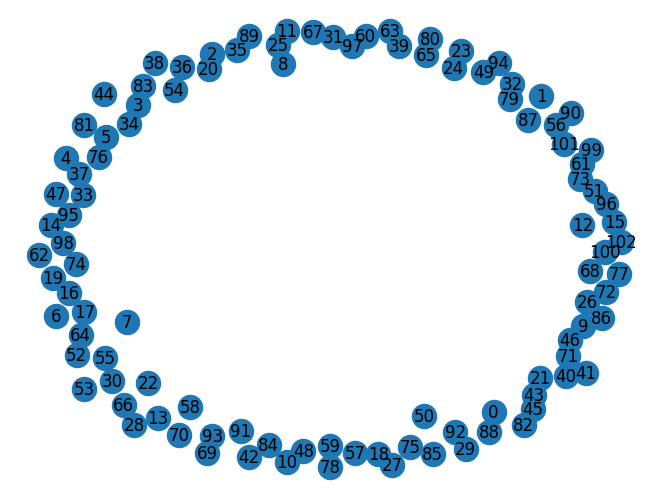

In [15]:
G = nx.Graph() # create empty graph first

# simce we have a dataframe, we just use a loop instead of manually putting in values:

## Add the NODE:
for idx, row in data.iterrows():
    # idx represents the index number, a representation of the customers' name.
    # row["Customer"] is the customer ID
    G.add_node(idx, label=row["Customer"])


nx.draw(G, with_labels=True)

These are all the 103 customers in this data, all forming a ring and showing no relationship. 

Next: We add the edges that uses the similarity scores. 

4. Use the edge to draw lines of connection between customers that have strong similar interests.

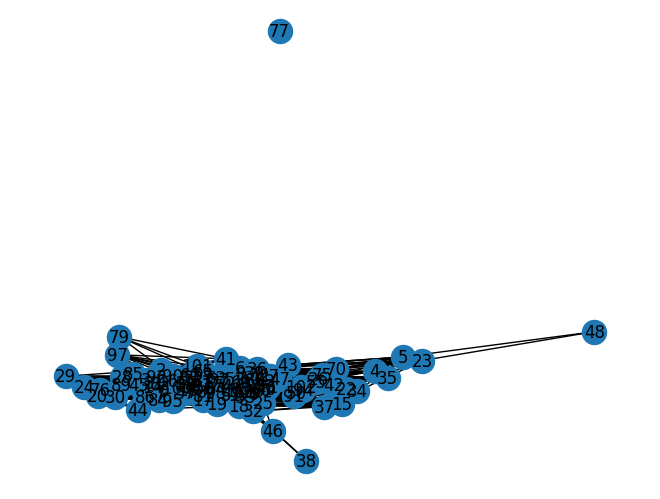

In [16]:
# Add edges based on similarity
for i in range(len(data)):
    for j in range(i+1, len(data)):
        # You can set a threshold if you want to have only stronger connections
        if similarity_matrix[i][j] > 0.7:  # You may remove this condition or modify the threshold. Here, we want only strong connections.
            G.add_edge(i, j, weight=similarity_matrix[i][j])

# the code above add the relationship between i and i+1, with their similarity score as the weight. 

nx.draw(G, with_labels=True)

This shows that most of the customers have a very strong connection. However, `77` has no relationship with any customer... hmmm

Let's investigate.

In [17]:
print(data.iloc[77])

Customer           5uHs
Shopping              0
Travel                0
Utilities             0
Betting               0
Fashion               0
Education             0
Health                0
Investment            0
Power                 0
Loan Seeking          0
Car Sales             0
Non-Interest          0
Product1              0
Product2              1
Product3              0
Product4              1
Product5              0
Product6              0
Product7              0
Product8              0
Product9              0
Product10             0
Customer_Rating     LOW
State_Residence      12
Gender             MALE
Age                  27
Name: 77, dtype: object


The customer,`77`, has no identified interest. So we can drop it since it provides no information. 

In [18]:
data = data.drop(data.index[77])

In [19]:
data[data["Customer"]=="5uHs"]

Empty DataFrame
Columns: [Customer, Shopping, Travel, Utilities, Betting, Fashion, Education, Health, Investment, Power, Loan Seeking, Car Sales, Non-Interest, Product1, Product2, Product3, Product4, Product5, Product6, Product7, Product8, Product9, Product10, Customer_Rating, State_Residence, Gender, Age]
Index: []

In [20]:
# reset index after dropping row
data.reset_index(drop=True, inplace=True)

print(len(data))

102


102


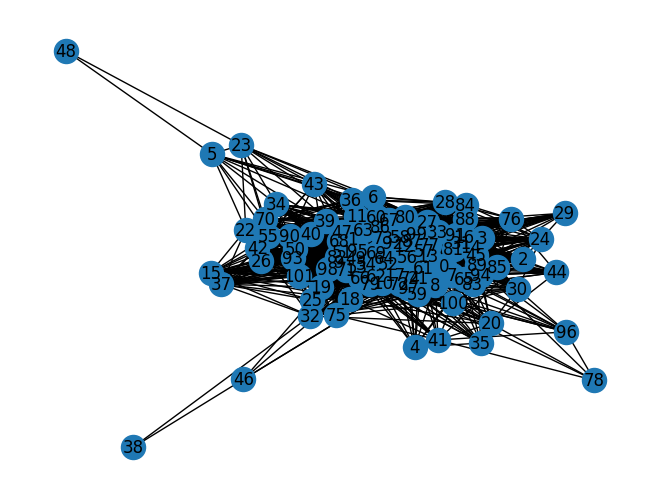

In [21]:
# repeat the codes

features = data[['Shopping', 'Travel', 'Utilities', 'Betting', 'Fashion',
               'Education', 'Health', 'Investment', 'Power', 'Loan Seeking',
               'Car Sales', 'Non-Interest']]

similarity_matrix = cosine_similarity(features)

print(len(similarity_matrix))

G = nx.Graph()

## NODE:
for idx, row in data.iterrows():
    G.add_node(idx, label=row["Customer"])

for i in range(len(data)):
    for j in range(i+1, len(data)):
        if similarity_matrix[i][j] > 0.7: 
            G.add_edge(i, j, weight=similarity_matrix[i][j])

nx.draw(G, with_labels=True)

We have our graph network set.

Before going to the next step of grouping customers and making recommendations, we can do some visuals. We can display the graph for each interest and see the degree of closeness in each one. 

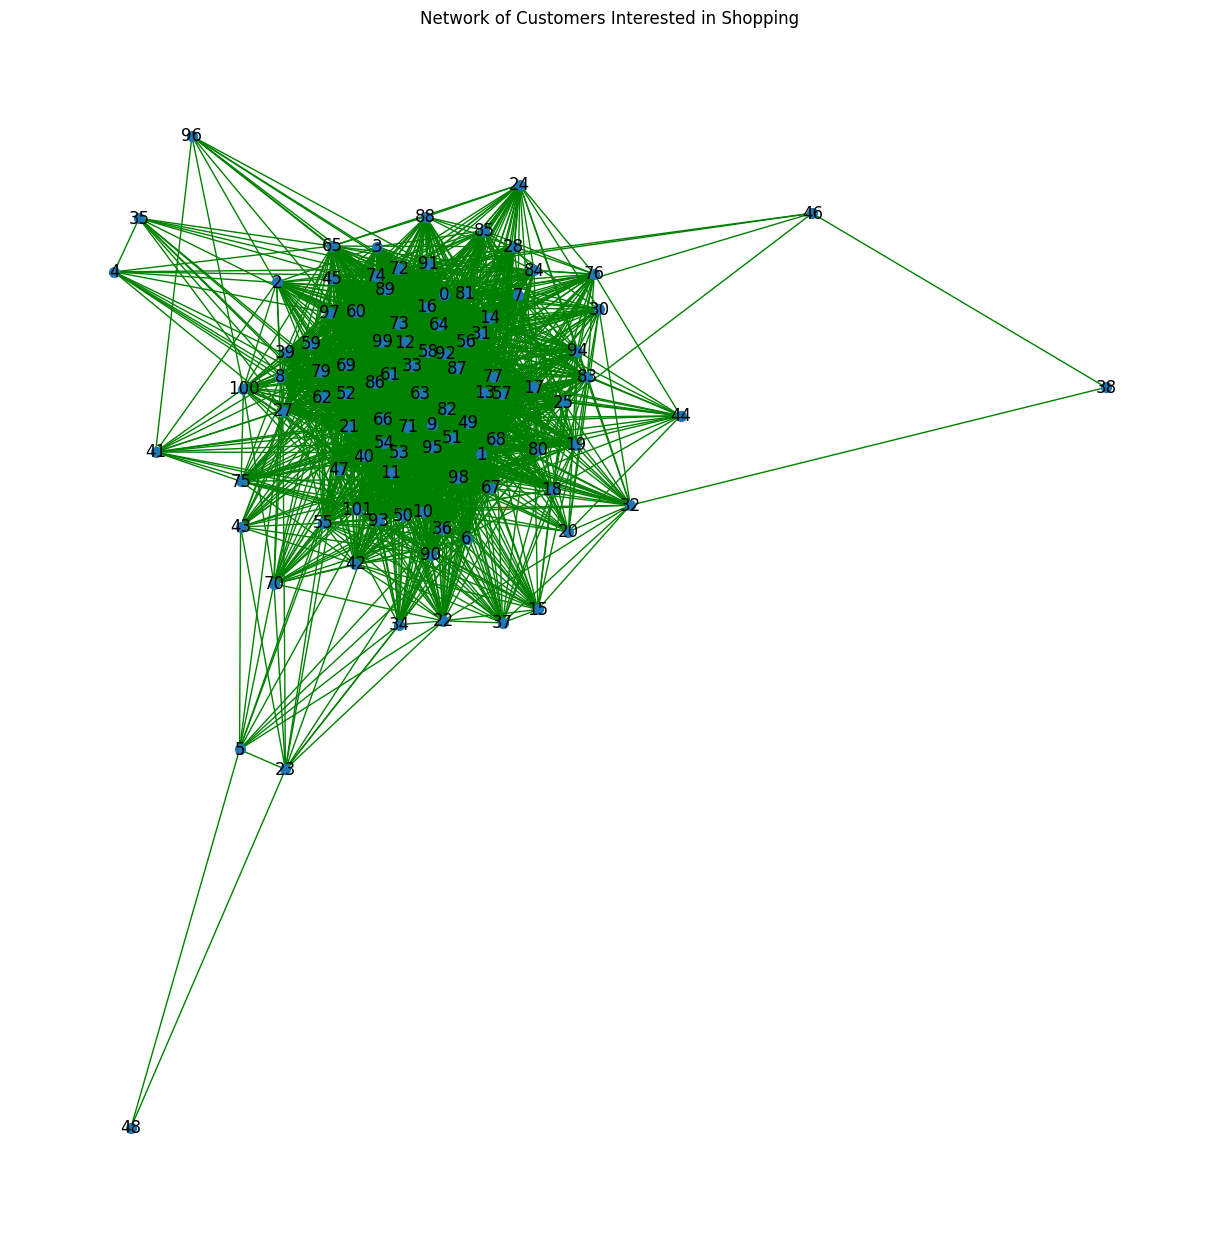

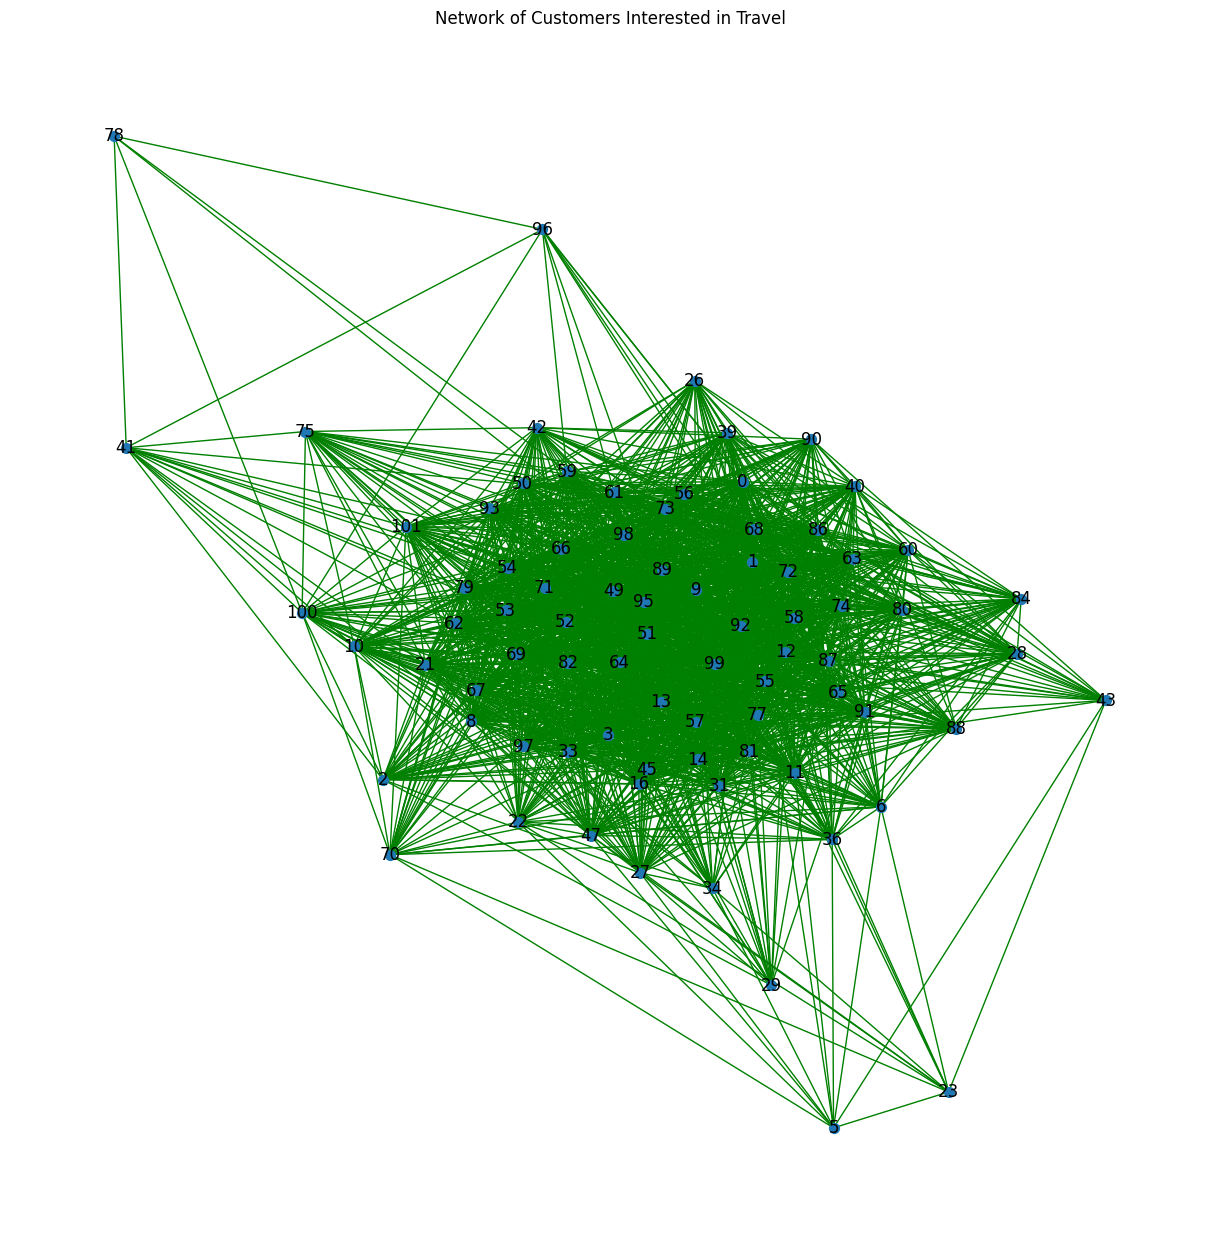

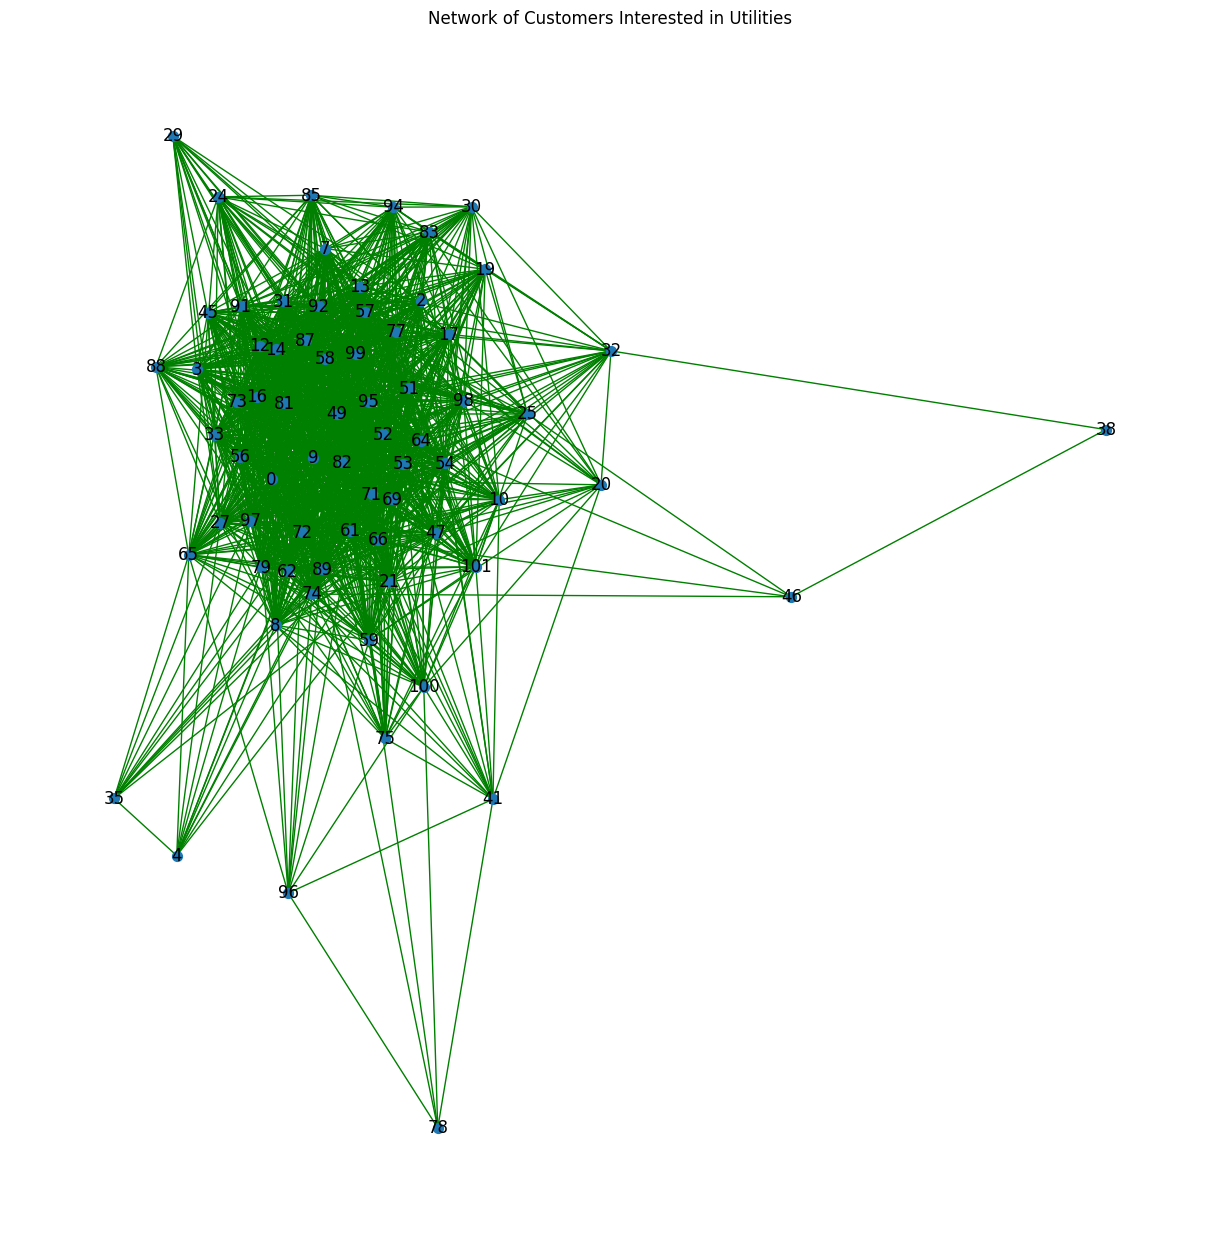

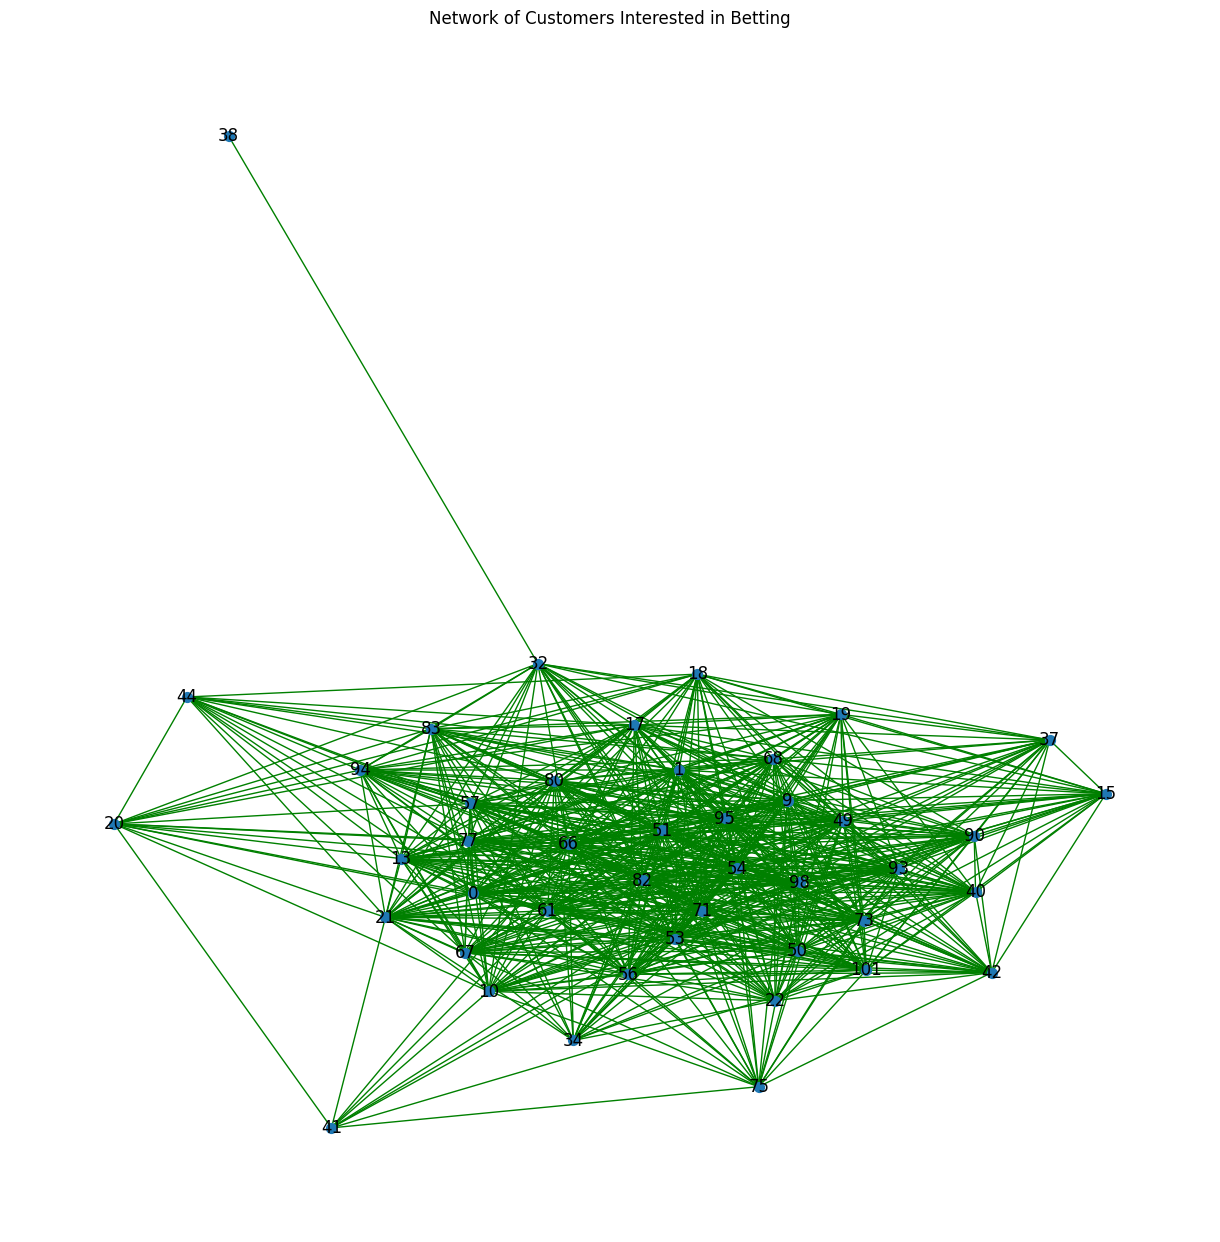

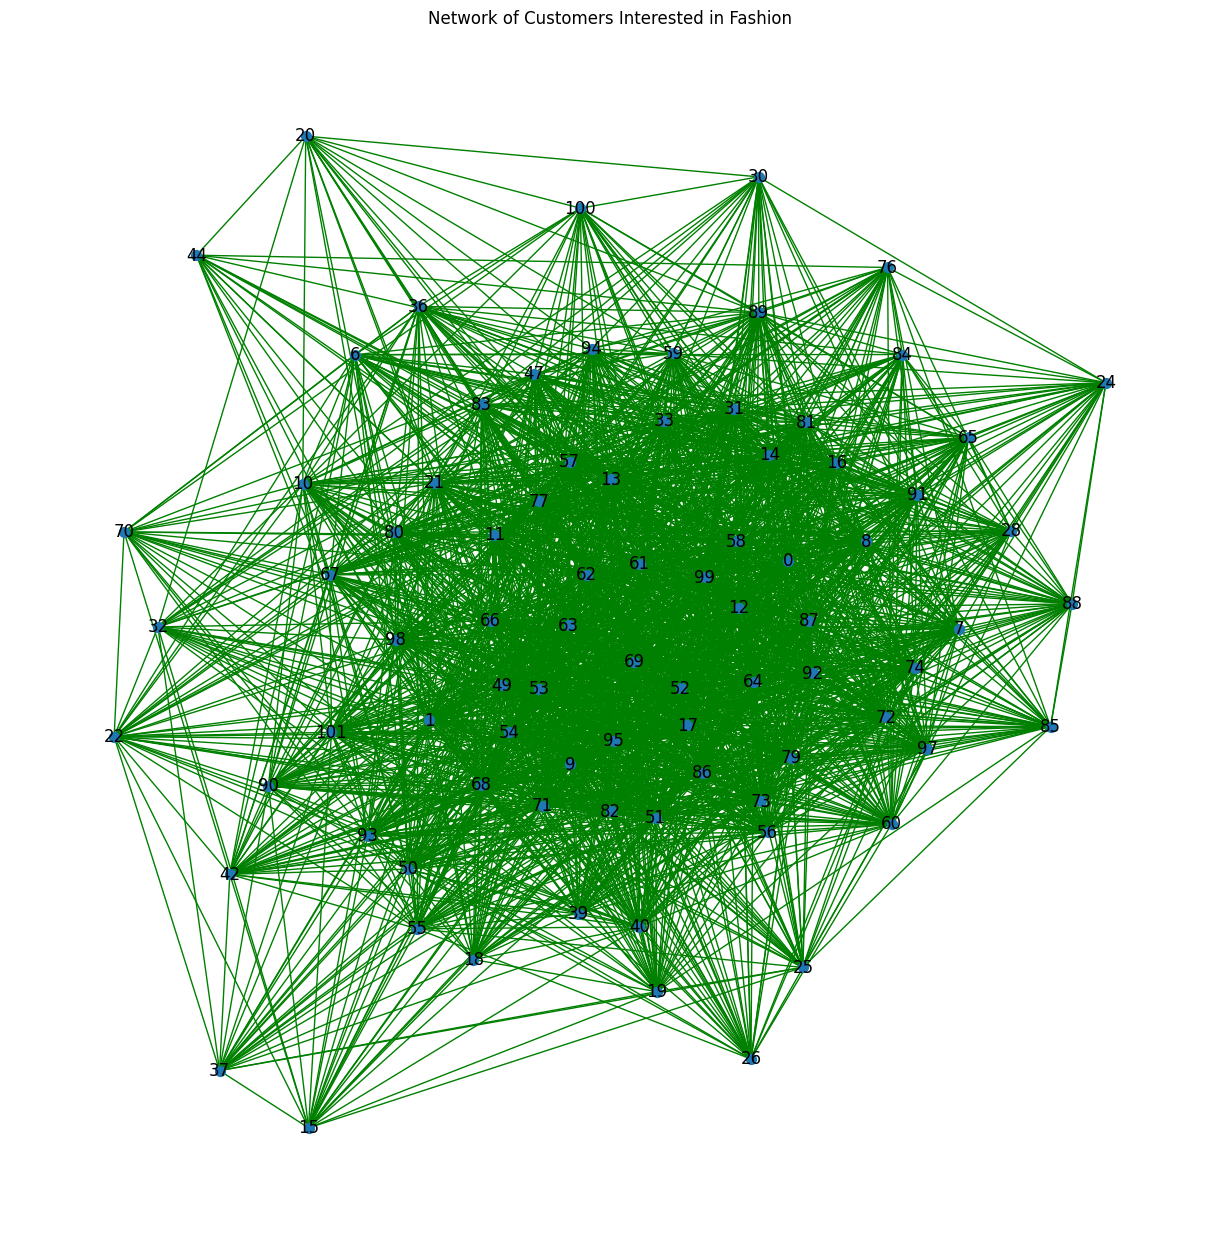

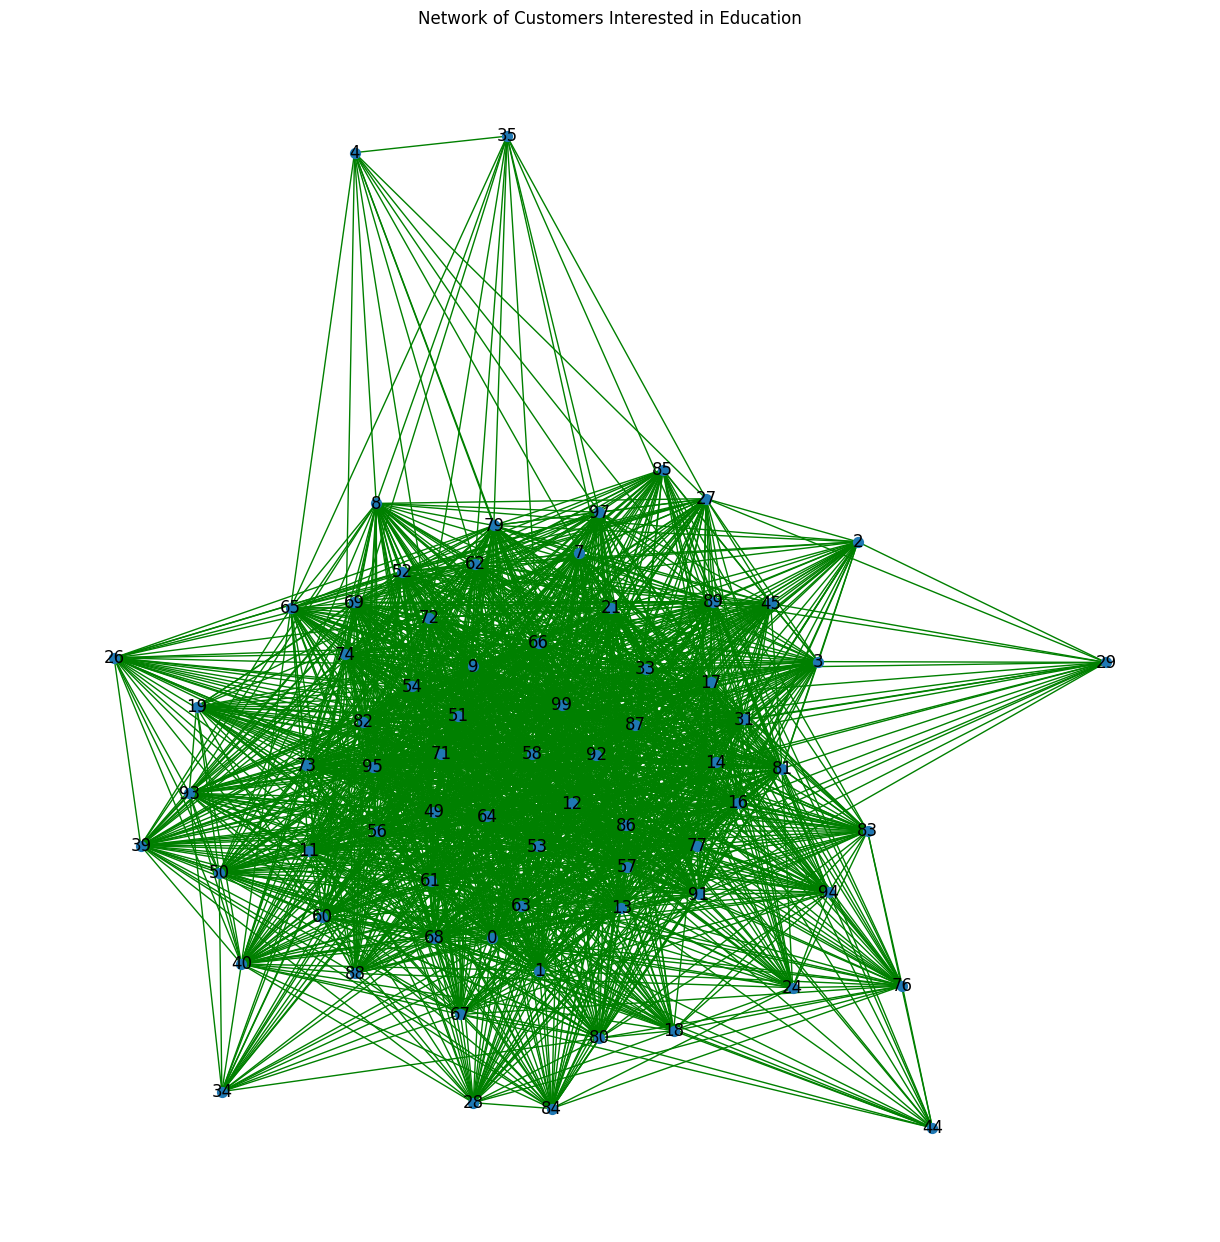

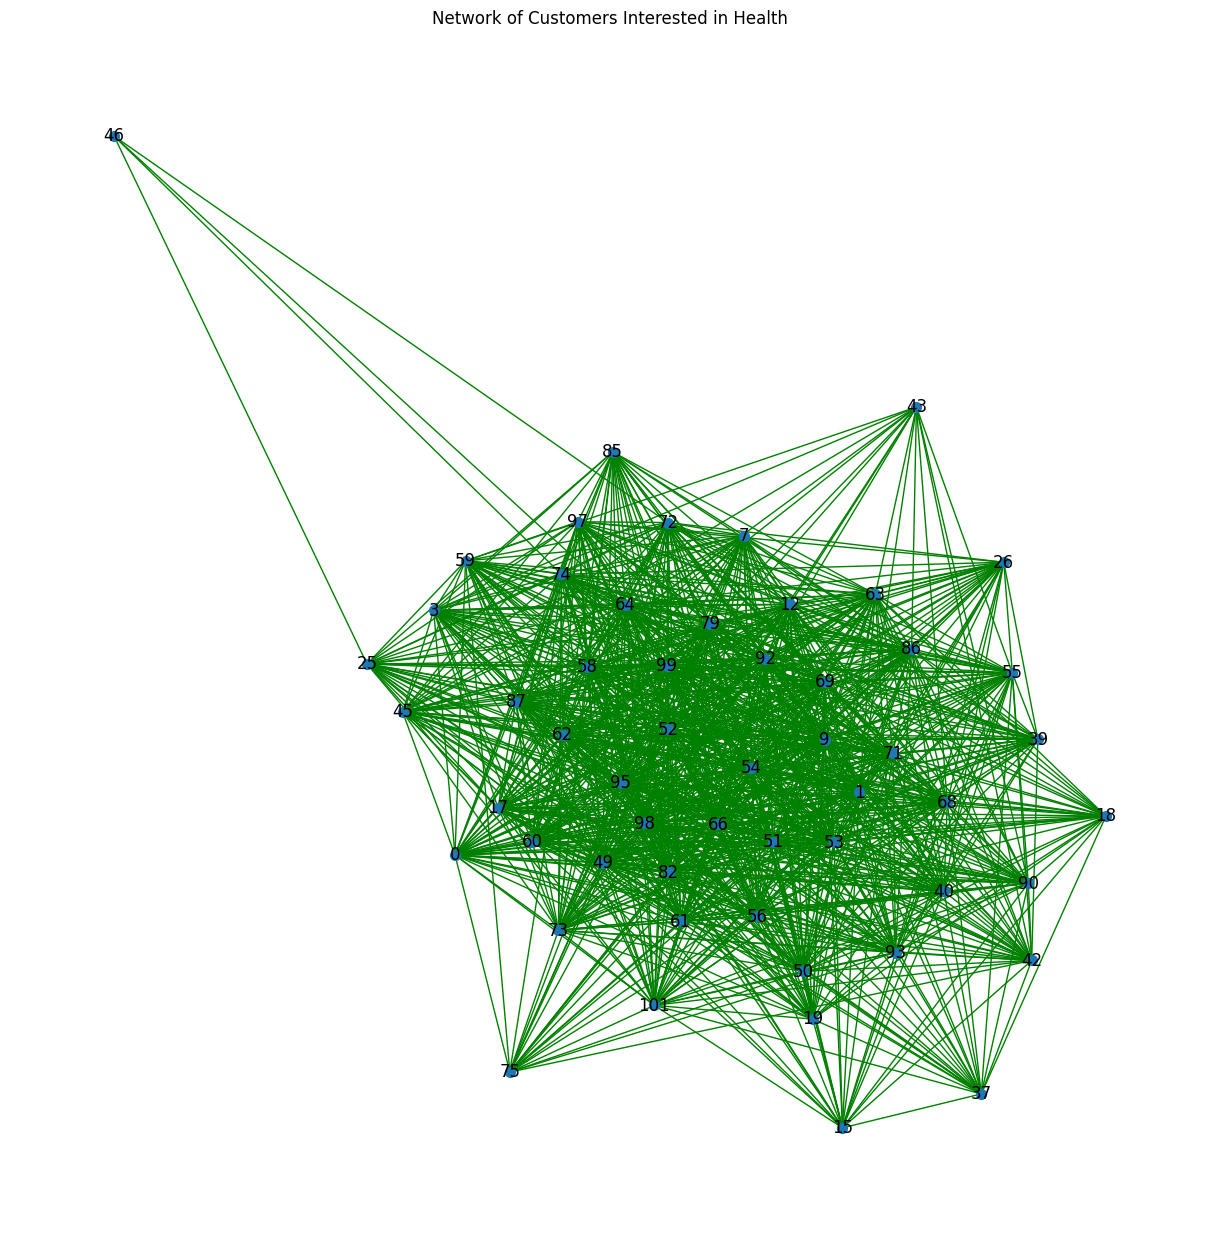

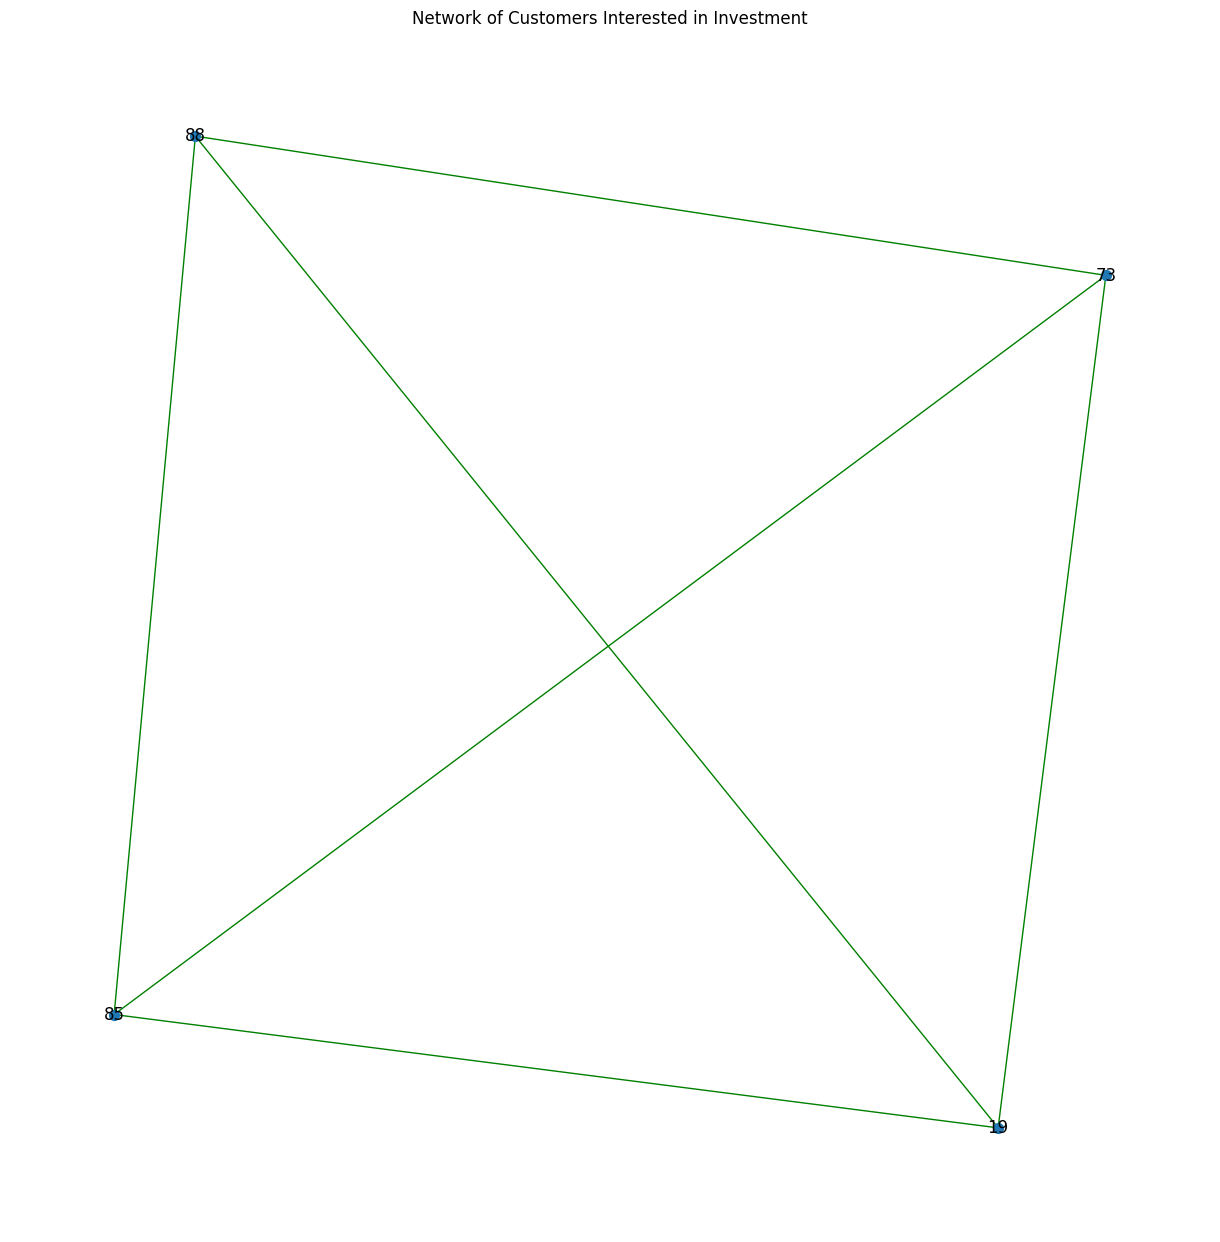

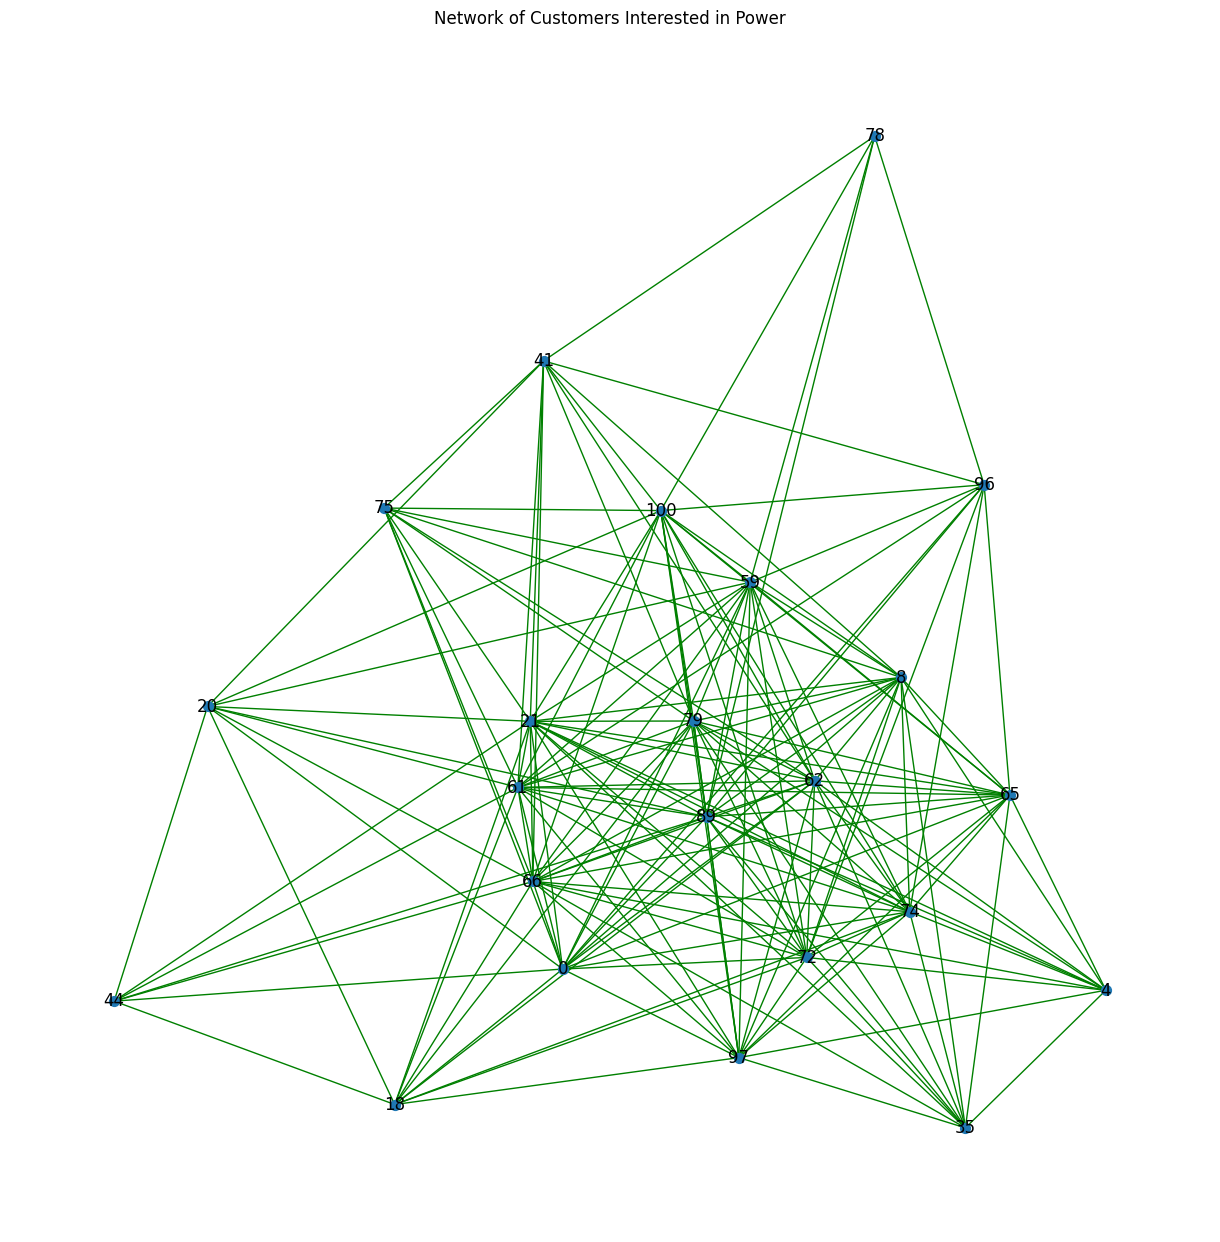

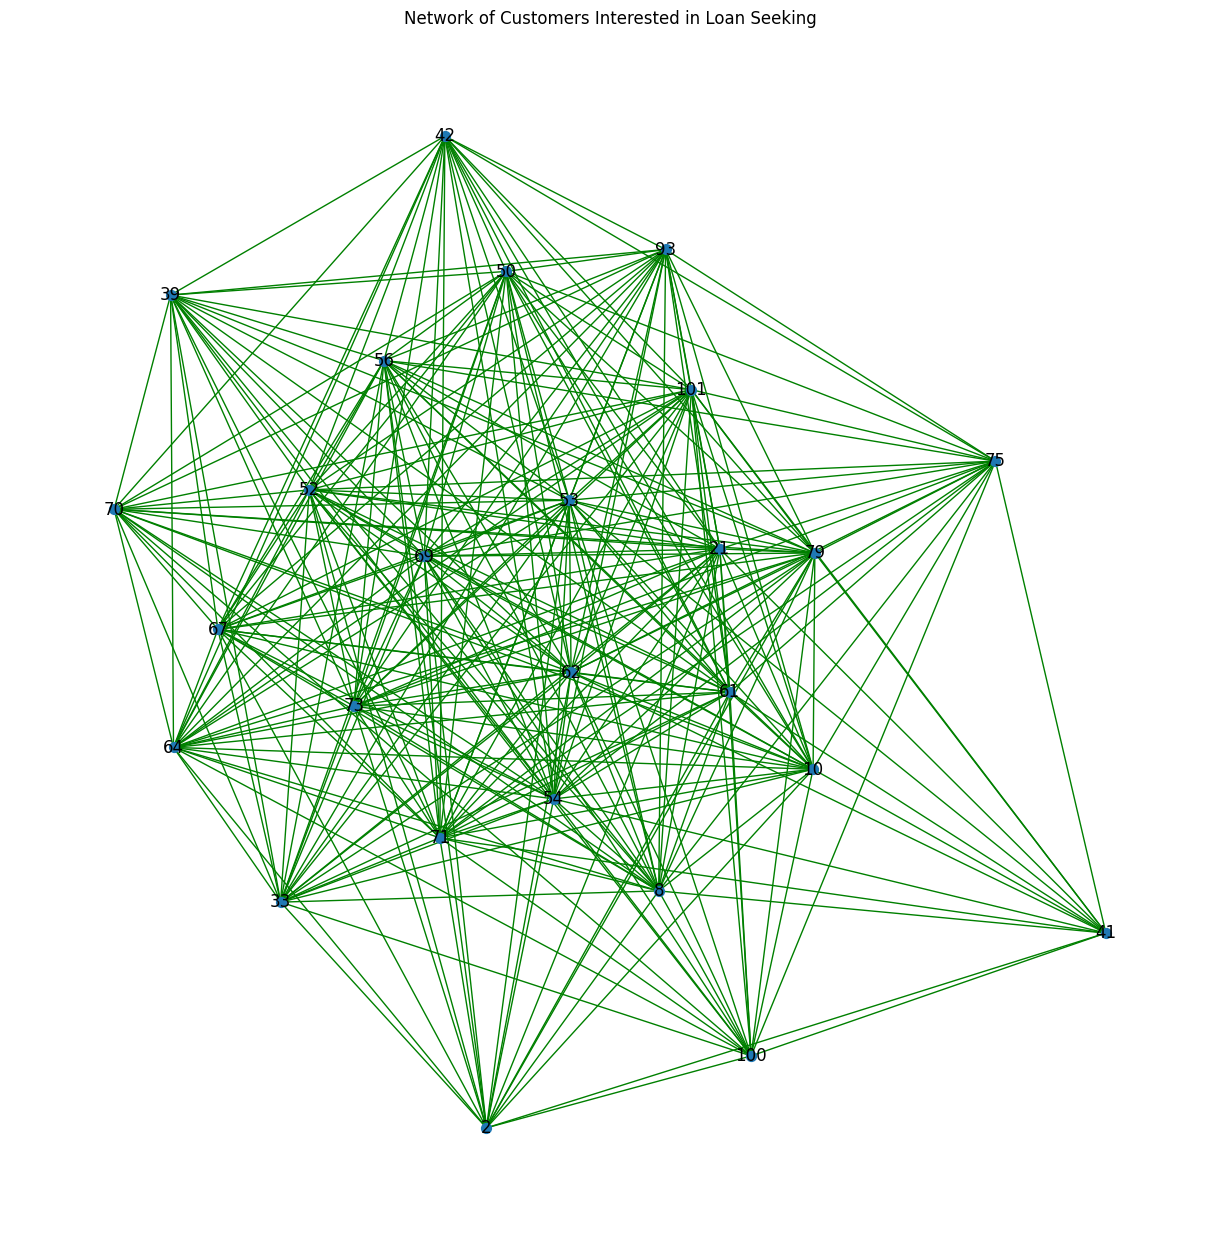

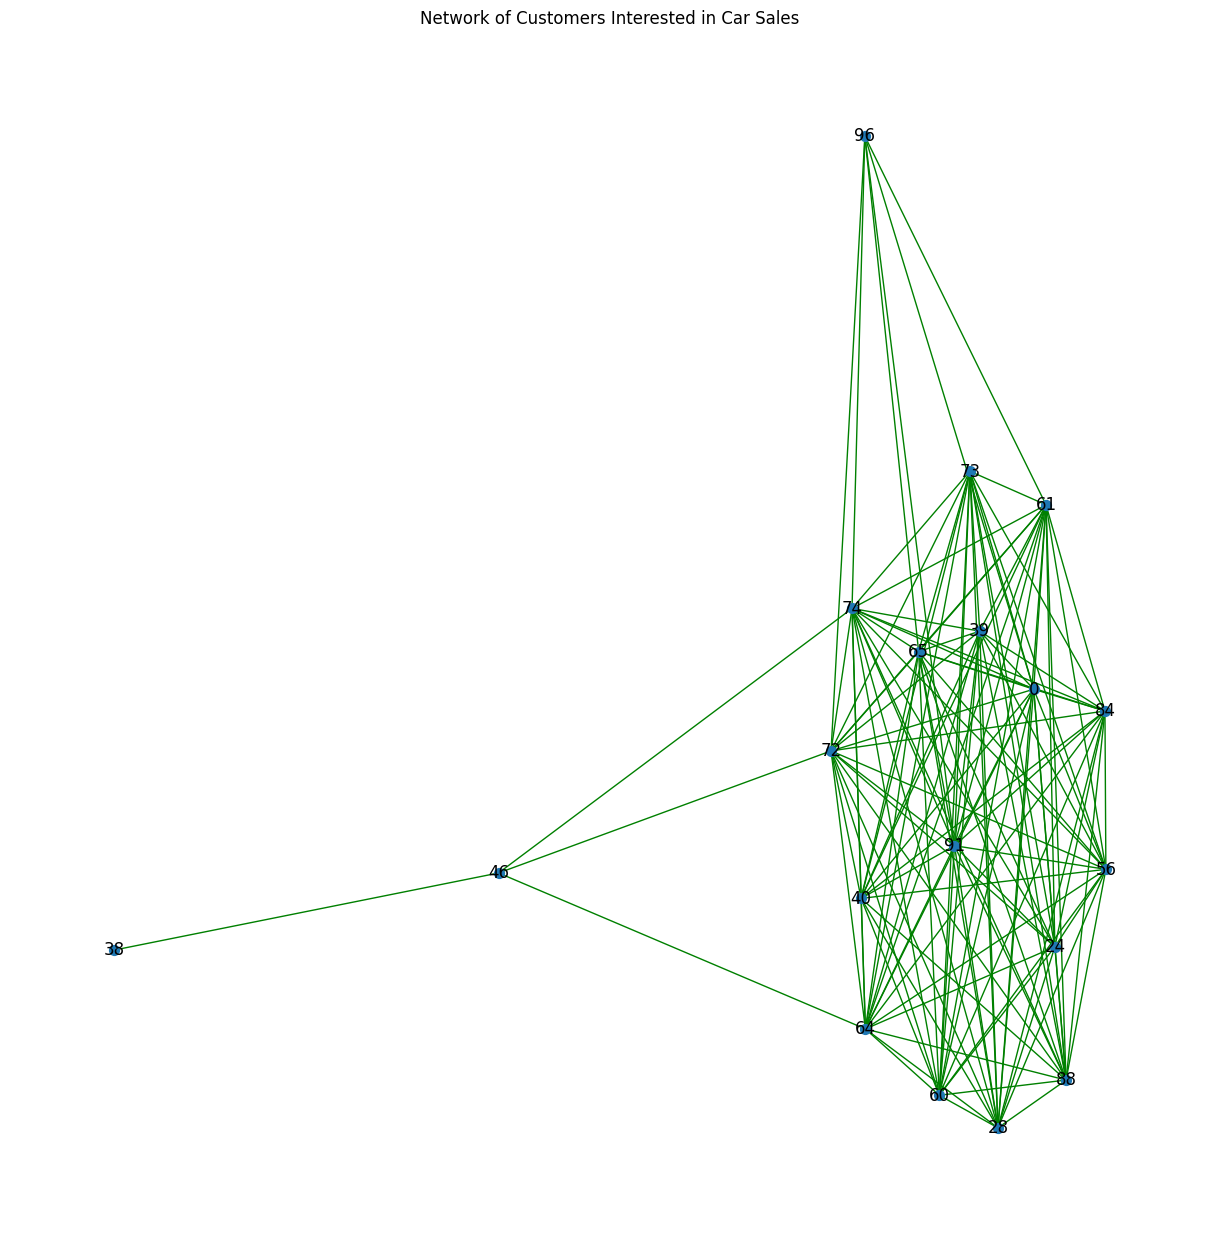

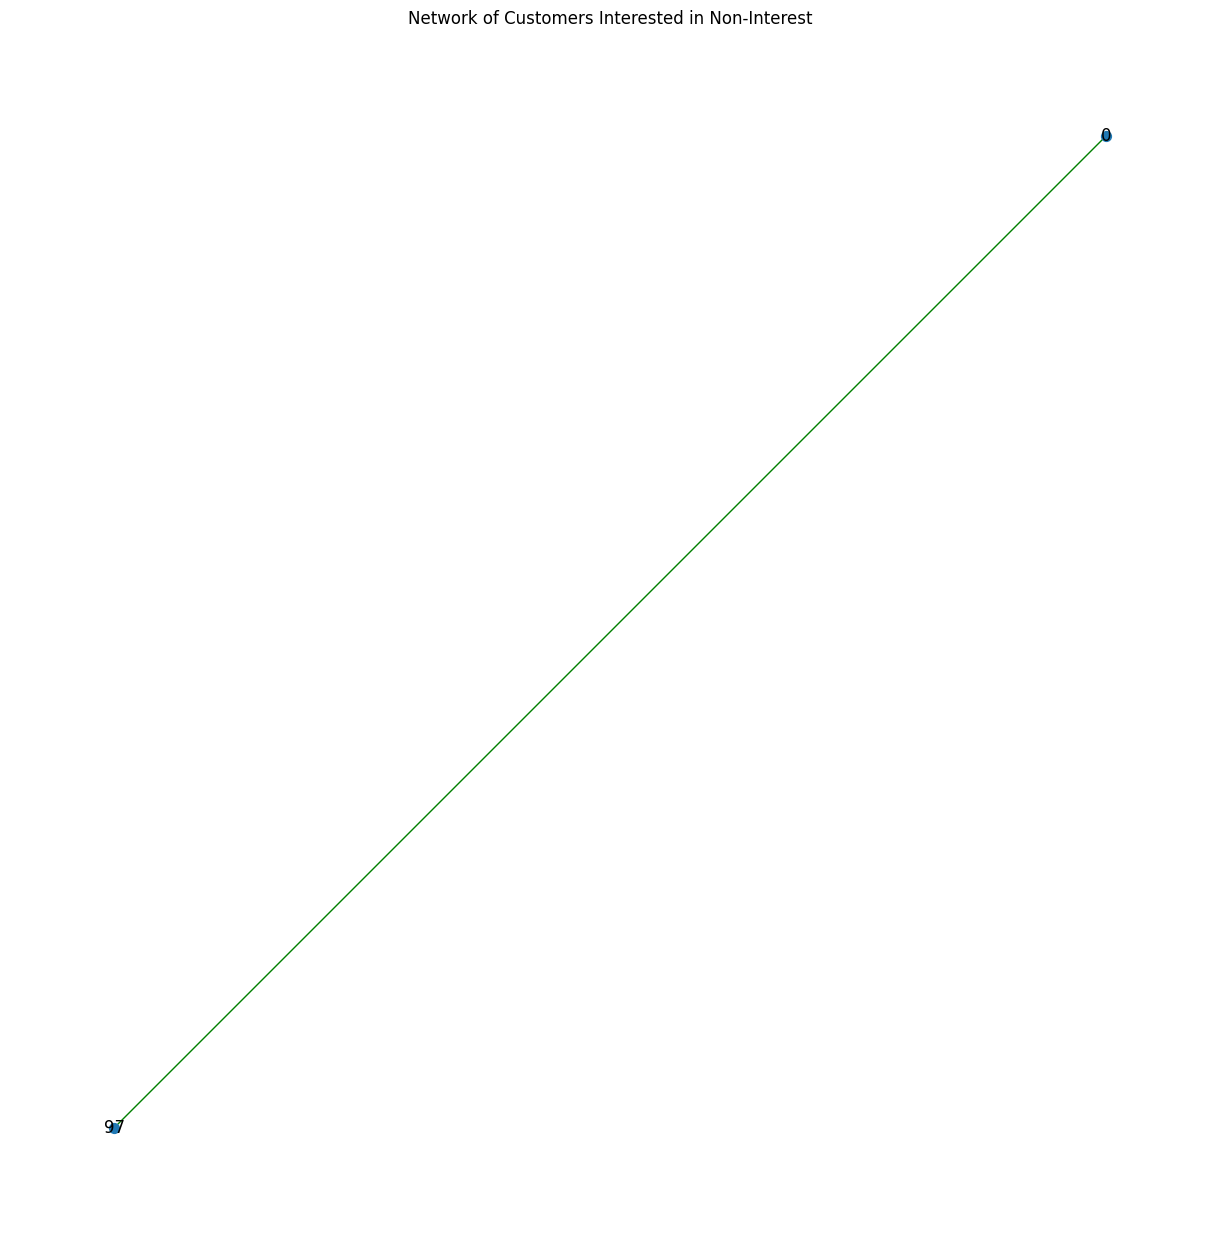

In [22]:
def draw_interest_graph(data, interest):
    try:
        nodes = [node for node, d in G.nodes(data=True) if data.loc[node, interest] == 1]
        # Create a subgraph using only these nodes
        subgraph = G.subgraph(nodes)

        pos = nx.spring_layout(subgraph)  # Using the spring layout for better visualization
        return subgraph, pos
    except:
        pass

for interest in features.columns:    
    subgraph, pos = draw_interest_graph(data, interest)
    plt.figure(figsize=(12,12))
    nx.draw(subgraph, pos, with_labels=True, node_size=50, edge_color='green')
    plt.title(f"Network of Customers Interested in {interest}")
    plt.show()

__Step 2: Product Recommendation Using Community Detection__
1. Use community detection to partition customers into groups (aka "communities")
2. Identify products that can be recommended to each community.

`pip install python-louvain==0.16`

In [23]:
import community as community_louvain

# Detect communities
partition = community_louvain.best_partition(G)

# Add community as an attribute to each node
for node, comm_id in partition.items():
    G.nodes[node]['community'] = comm_id

In [24]:
print(partition)

{0: 0, 1: 1, 2: 2, 3: 2, 4: 2, 5: 3, 6: 3, 7: 0, 8: 2, 9: 1, 10: 1, 11: 3, 12: 3, 13: 0, 14: 2, 15: 1, 16: 2, 17: 0, 18: 1, 19: 1, 20: 0, 21: 2, 22: 1, 23: 3, 24: 0, 25: 1, 26: 3, 27: 2, 28: 3, 29: 2, 30: 0, 31: 2, 32: 1, 33: 2, 34: 1, 35: 2, 36: 3, 37: 1, 38: 2, 39: 3, 40: 1, 41: 2, 42: 1, 43: 3, 44: 0, 45: 2, 46: 2, 47: 2, 48: 3, 49: 1, 50: 1, 51: 1, 52: 2, 53: 1, 54: 1, 55: 3, 56: 1, 57: 0, 58: 3, 59: 2, 60: 3, 61: 2, 62: 2, 63: 3, 64: 2, 65: 2, 66: 1, 67: 1, 68: 1, 69: 2, 70: 3, 71: 1, 72: 2, 73: 1, 74: 2, 75: 1, 76: 0, 77: 0, 78: 2, 79: 2, 80: 1, 81: 2, 82: 1, 83: 0, 84: 3, 85: 0, 86: 3, 87: 3, 88: 2, 89: 2, 90: 1, 91: 2, 92: 3, 93: 1, 94: 0, 95: 1, 96: 2, 97: 2, 98: 1, 99: 3, 100: 2, 101: 1}


In [25]:
# Add community column to the original dataframe
data['community'] = data.index.map(partition)

# For example, finding the top interests in each community
top_interests = data.groupby('community').mean().transpose()

print(top_interests)


community                0         1          2          3
Shopping          1.000000   1.00000   0.942857   0.952381
Travel            0.285714   0.81250   0.885714   0.952381
Utilities         0.857143   0.56250   1.000000   0.238095
Betting           0.642857   0.96875   0.114286   0.000000
Fashion           1.000000   0.93750   0.657143   0.809524
Education         0.857143   0.65625   0.771429   0.619048
Health            0.285714   0.81250   0.371429   0.571429
Investment        0.071429   0.06250   0.028571   0.000000
Power             0.214286   0.09375   0.485714   0.000000
Loan Seeking      0.000000   0.37500   0.342857   0.095238
Car Sales         0.142857   0.09375   0.285714   0.190476
Non-Interest      0.071429   0.00000   0.028571   0.000000
Product1          0.928571   0.75000   0.685714   0.666667
Product2          0.857143   1.00000   0.857143   0.952381
Product3          0.000000   0.00000   0.028571   0.047619
Product4          0.428571   0.68750   0.714286   0.4761

/var/folders/2x/3p0r8mnx6s7f7rwwg4fjmv3c0000gn/T/ipykernel_15310/1818693398.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_interests = data.groupby('community').mean().transpose()


In [38]:
def recommend_products_for_community(community_id):
    """
    There are two approaches here: 
    1. Recommended products that are least used within that community, to members who are not signed up.
    2. Recommend products that are most used within that community, to members who are not signed up.
    """
    community_members = data[data['community'] == community_id]
    
    # Find top interests
    mean_interests = community_members[['Shopping', 'Travel', 'Utilities', 'Betting', 'Fashion',
               'Education', 'Health', 'Investment', 'Power', 'Loan Seeking',
               'Car Sales', 'Non-Interest']].mean()
    
    top_interests = mean_interests.sort_values(ascending=False).index.tolist()
    
    # Identify products that majority of the community hasn't adopted yet
    mean_products = community_members[['Product1', 'Product2', 'Product3', 'Product4', 'Product5', 
               'Product6', 'Product7', 'Product8', 'Product9', 'Product10']].mean()
    
    recommended_least_used_products = mean_products[mean_products < 0.5].index.tolist()
    recommended_most_used_products = mean_products[mean_products > 0.5].index.tolist()
    
    return top_interests, recommended_least_used_products, recommended_most_used_products

In [35]:
### Example of what the mean_products look like

# community_id = 3 # Example community
# interests, m, products = recommend_products_for_community(community_id)

# print(m)

Product1     0.666667
Product2     0.952381
Product3     0.047619
Product4     0.476190
Product5     0.000000
Product6     0.047619
Product7     0.047619
Product8     0.000000
Product9     0.047619
Product10    0.000000
dtype: float64


In [33]:
community_id = 3 # Example community
interests, least_products, top_products = recommend_products_for_community(community_id)
print("Top interests for community {}: {}".format(community_id, interests))
print("Recommended products for community {}: {}".format(community_id, least_products))
print("Recommended products for community {}: {}".format(community_id, top_products))

Top interests for community 3: ['Shopping', 'Travel', 'Fashion', 'Education', 'Health', 'Utilities', 'Car Sales', 'Loan Seeking', 'Betting', 'Investment', 'Power', 'Non-Interest']
Recommended products for community 3: ['Product3', 'Product4', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9', 'Product10']


__Evaluation__
Compare products currently used by customers in that group vs the ones recommended.

__Home Work__

Add more features to the cosine_similarity features. Such as the Age, State of Residence, etc., and compare the performance.  

### Inferencing

You can get the interests of a new customer and assign them to the nearest community. With that you can know what products to recommend to them. 

In [39]:
def assign_community(new_customer_interests, interests_df, community_labels):
    # Compute similarity with all existing customers
    similarities = cosine_similarity([new_customer_interests], interests_df).flatten()

    # Compute average similarity with each community
    community_avg_similarities = {}
    for community, members in community_labels.items():
        community_avg_similarities[community] = similarities[members].mean()

    # Assign to community with highest average similarity
    assigned_community = max(community_avg_similarities, key=community_avg_similarities.get)
    
    return assigned_community

# Test with a new customer's interests
new_customer_interests = [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]  # This is an example vector for the new customer
assigned_community = assign_community(new_customer_interests, features, partition)

print(f"New customer belongs to community: {assigned_community}")

interests, least_products, top_products = recommend_products_for_community(assigned_community)
print("Top interests for community {}: {}".format(assigned_community, interests))
print("Recommended least used products for community {}: {}".format(assigned_community, least_products))
print("Recommended most used products for community {}: {}".format(assigned_community, top_products))


New customer belongs to community: 2
Top interests for community 2: ['Utilities', 'Shopping', 'Travel', 'Education', 'Fashion', 'Power', 'Health', 'Loan Seeking', 'Car Sales', 'Betting', 'Investment', 'Non-Interest']
Recommended least used products for community 2: ['Product3', 'Product5', 'Product6', 'Product7', 'Product8', 'Product9', 'Product10']
Recommended most used products for community 2: ['Product1', 'Product2', 'Product4']


----

## Thank you!